In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import SpectralEmbedding
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.cluster.hierarchy import ward, fcluster
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Read in the basketball-reference dataframe
df = pd.read_csv(r"C:\Users\vaugh\Desktop\basketball-pf-research\Basketball-reference data\new_df_with_all_pf(2001-2024).csv")
df.set_index(['Season', 'Player'], inplace=True)

In [3]:
df

G      MP  USG%         FGA  \
Season Player                                               
2001   A.C. Green          82.0  1411.0  14.4   31.125486   
       Aaron Williams      82.0  2336.0  17.8   22.428054   
       Adam Keefe          67.0   836.0  11.5   35.516550   
       Al Harrington       78.0  1892.0  18.8   27.411163   
       Alan Henderson      73.0  1810.0  22.6   34.479334   
...                         ...     ...   ...         ...   
2024   Usman Garuba         6.0    18.0  20.8  256.000000   
       Wenyen Gabriel       5.0    81.0  17.0   38.628258   
       Xavier Tillman Sr.  54.0   974.0  14.8   36.826074   
       Zeke Nnaji          58.0   576.0  15.4   60.738889   
       Zion Williamson     70.0  2207.0  29.7   36.157508   

                           Personal Fouls Committed         BLK        STL  \
Season Player                                                                
2001   A.C. Green                         11.672057    0.778137   3.112549   
       Aaron Williams                     11.072077    3.974592   1.987296   
       Adam Keefe                         22.197843    4.439569   5.919425   
       Al Harrington                      11.356053    0.783176   3.132704   
       Alan Henderson                      8.245058    1.499101   2.623428   
...                                             ...         ...        ...   
2024   Usman Garuba                       76.800000  128.000000  51.200000   
       Wenyen Gabriel                     17.558299    3.511660   3.511660   
       Xavier Tillman Sr.                  9.914712    5.665550   6.373744   
       Zeke Nnaji                         32.705556   16.352778   7.008333   
       Zion Williamson                     5.330915    1.622452   2.549568   

                                  DRB         ORB        TOV  ...  \
Season Player                                                 ...   
2001   A.C. Green           19.453429   10.115783   3.890686  ...   
       Aaron Williams       13.059373    7.381385   4.542391  ...   
       Adam Keefe           26.637412   19.238131   8.879137  ...   
       Al Harrington        13.313993    5.873821   7.440173  ...   
       Alan Henderson       11.618037    9.369384   6.371181  ...   
...                               ...         ...        ...  ...   
2024   Usman Garuba        179.200000  128.000000  76.800000  ...   
       Wenyen Gabriel       31.604938   12.290809  14.046639  ...   
       Xavier Tillman Sr.   18.413037    9.206519   4.249162  ...   
       Zeke Nnaji           25.697222   25.697222  11.680556  ...   
       Zion Williamson       9.502935    3.940241   6.489809  ...   

                           % of FG Ast'd - 2P    FTr  Shooting Fouls Drawn  \
Season Player                                                                
2001   A.C. Green                       0.764  0.343                   NaN   
       Aaron Williams                   0.623  0.477                   NaN   
       Adam Keefe                       0.683  0.396                   NaN   
       Al Harrington                    0.675  0.289                   NaN   
       Alan Henderson                   0.537  0.404                   NaN   
...                                       ...    ...                   ...   
2024   Usman Garuba                     0.000  0.333                   NaN   
       Wenyen Gabriel                   0.714  0.227                   NaN   
       Xavier Tillman Sr.               0.812  0.179                   NaN   
       Zeke Nnaji                       0.619  0.416                   NaN   
       Zion Williamson                  0.474  0.452                   NaN   

                           Corner 3s - %3PA  % of FGA by Distance - 3P  \
Season Player                                                            
2001   A.C. Green                     0.167                      0.019   
       Aaron Williams                 0.000                      0.003   
       Adam 

In [4]:
# Filter out players who played less than 20 games or 10 min/game in a season
df = df[(df['G'] >= 20) & ((df['MP'] / df['G']) >= 10)]

# Drop the G and MP columns as well as the Shooting Fouls column
df.drop(columns = ['G', 'MP', 'Shooting Fouls Drawn'], inplace=True)

C:\Users\vaugh\AppData\Local\Temp\ipykernel_73032\2111163697.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['G', 'MP', 'Shooting Fouls Drawn'], inplace=True)


In [5]:
corr_matrix = df.corr()

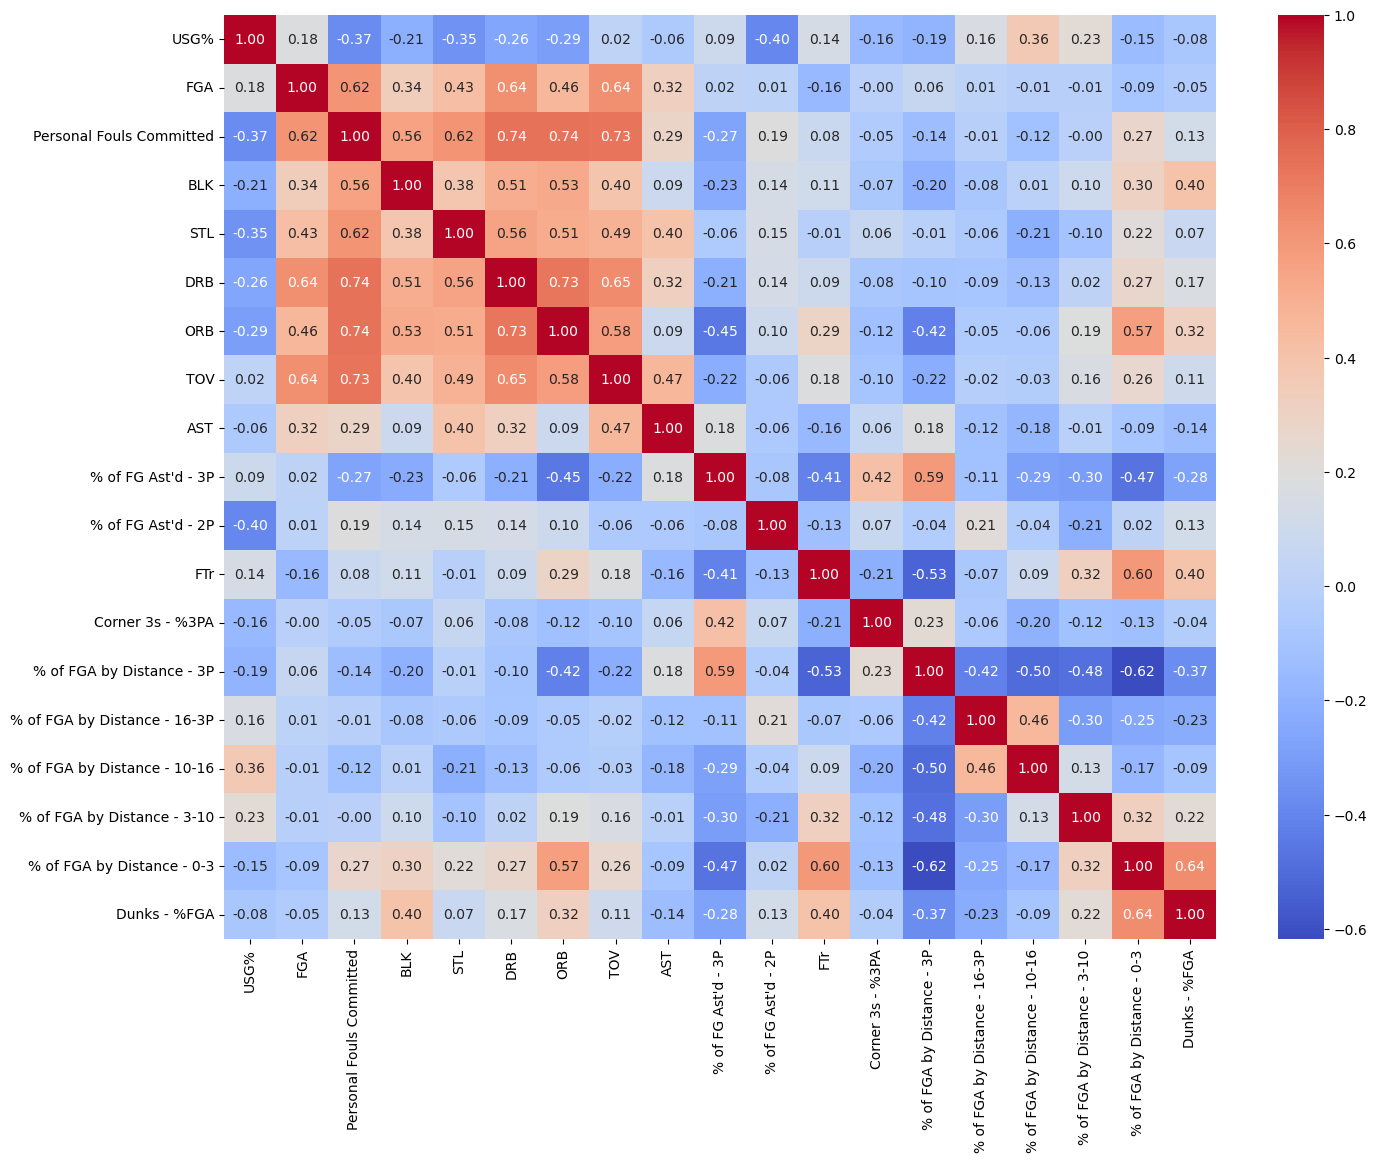

In [6]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.show()

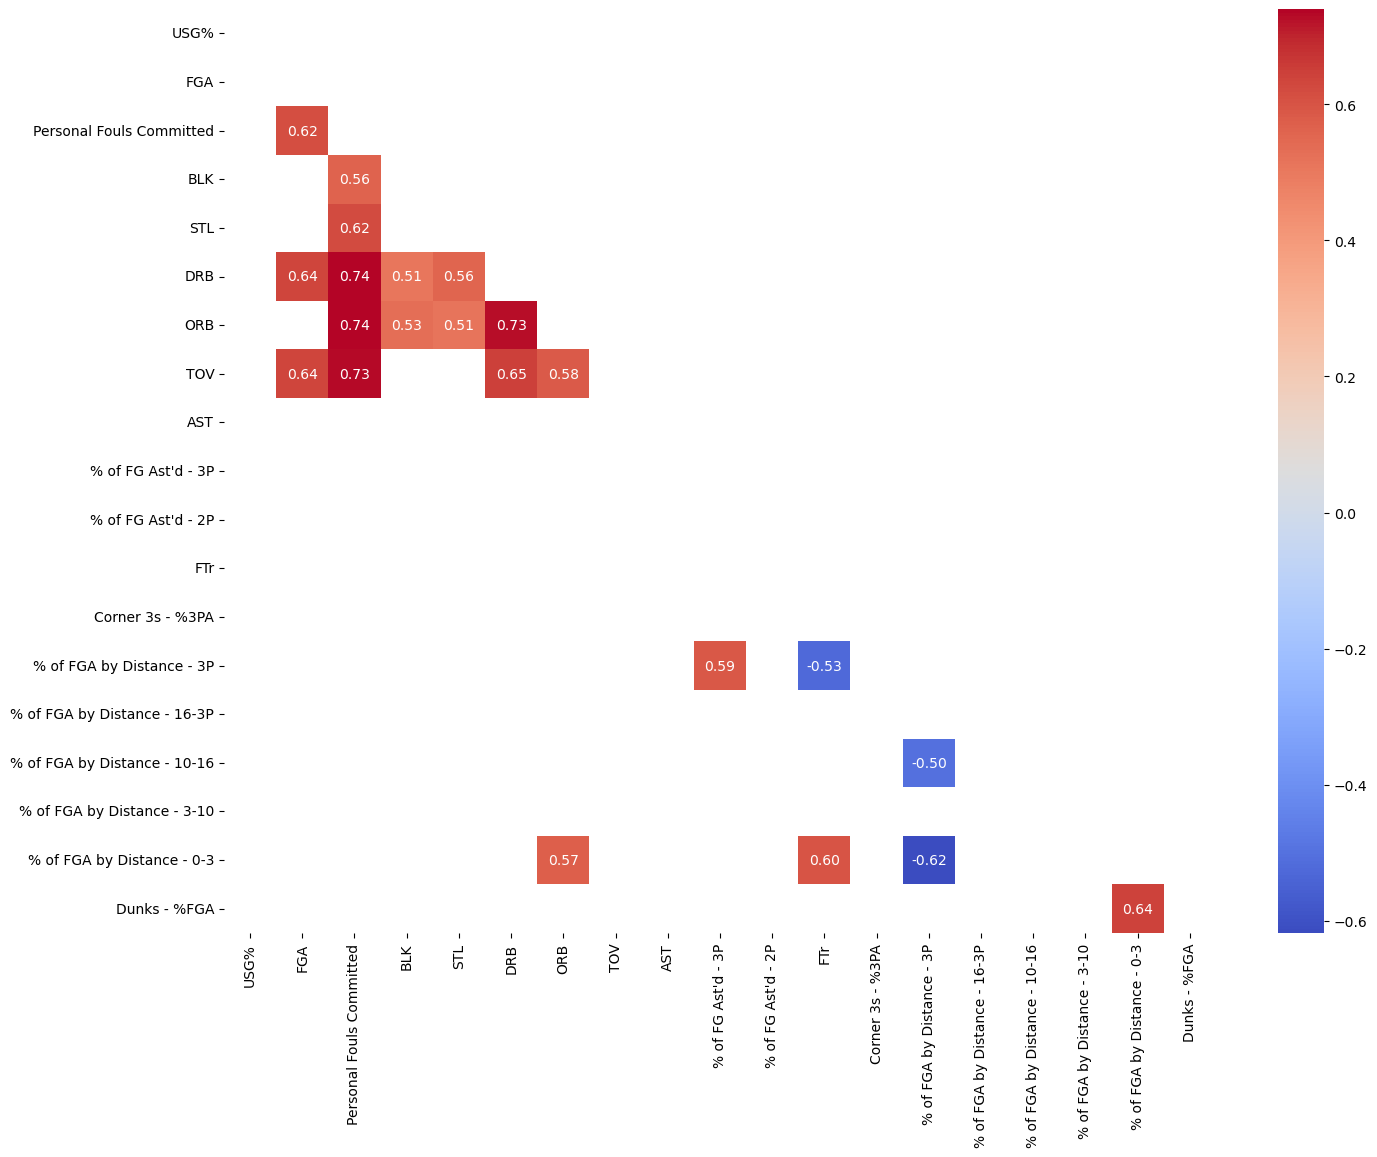

In [7]:
threshold = 0.5  # Only show correlations greater than 0.5
filtered_corr = corr_matrix[corr_matrix.abs() > threshold]

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, mask=mask)
plt.show()

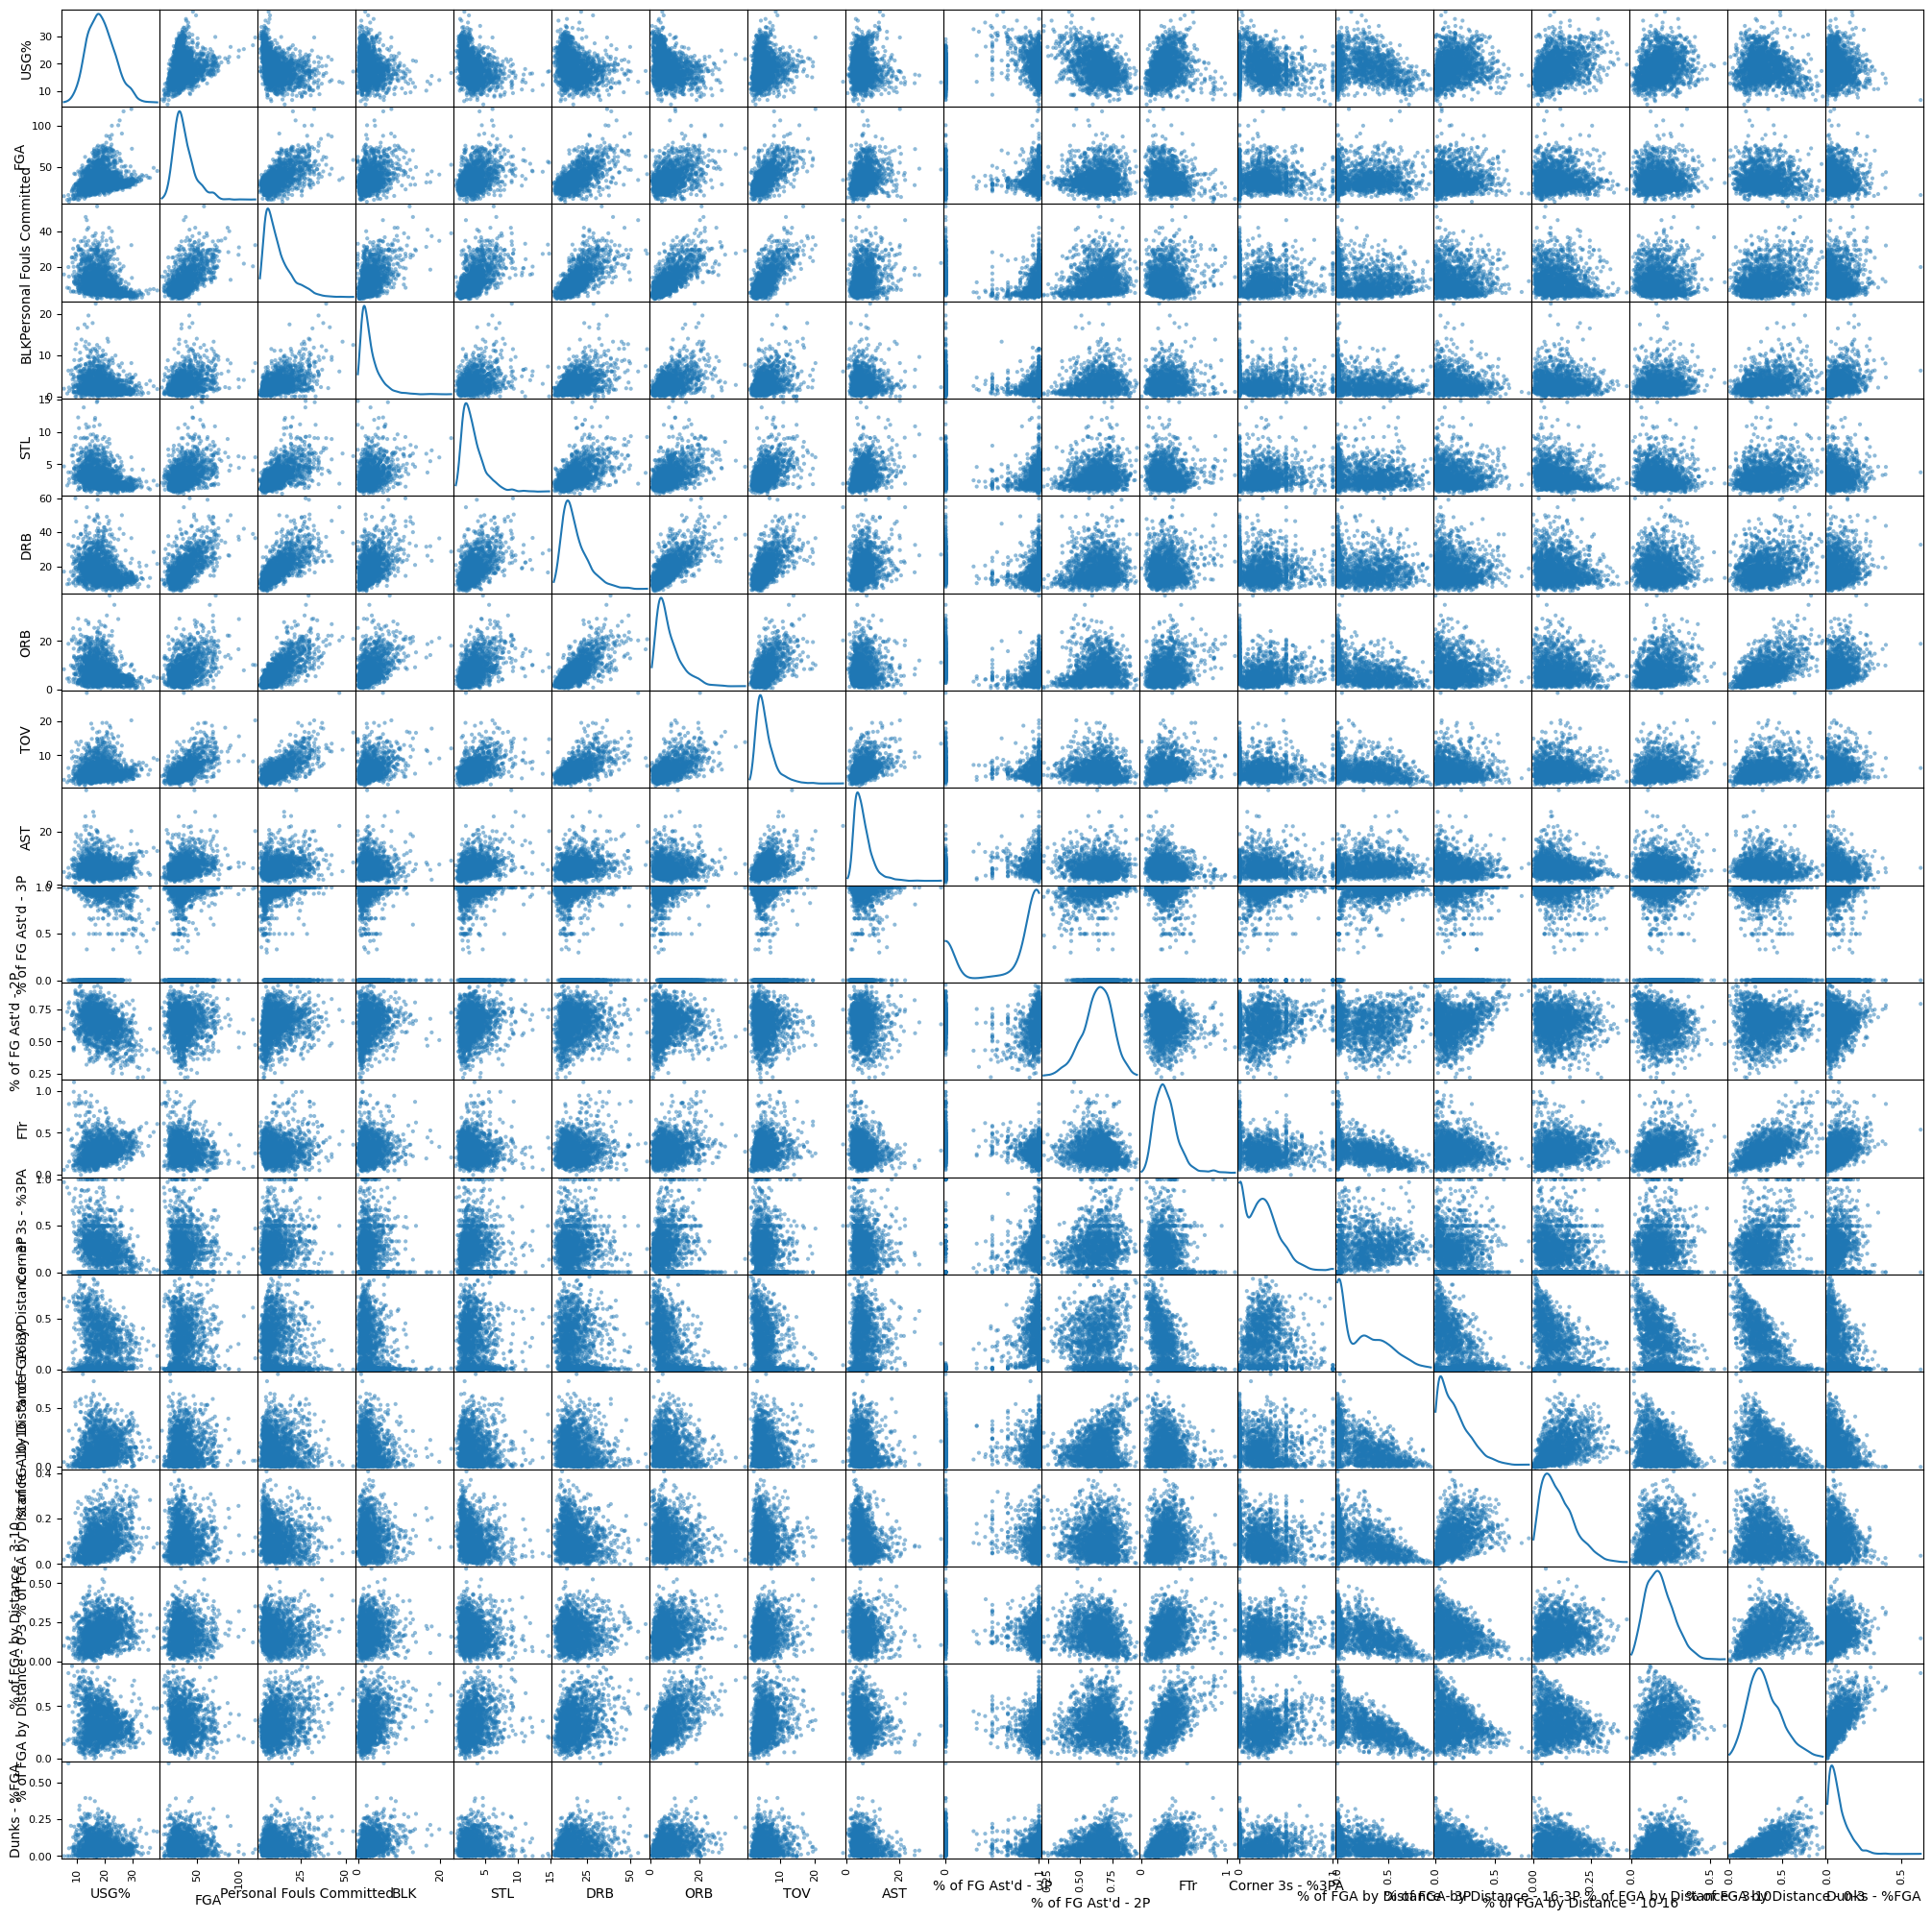

In [8]:
# Create the scatter matrix plot
scatter_matrix(df, figsize=(25, 25), diagonal='kde')
plt.show()

In [9]:
df.drop(columns = ['Dunks - %FGA', 'Personal Fouls Committed'], inplace=True)
df['TRB'] = df['ORB'] + df['DRB']

C:\Users\vaugh\AppData\Local\Temp\ipykernel_73032\2634902785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['Dunks - %FGA', 'Personal Fouls Committed'], inplace=True)
C:\Users\vaugh\AppData\Local\Temp\ipykernel_73032\2634902785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TRB'] = df['ORB'] + df['DRB']


In [10]:
df

USG%        FGA       BLK       STL        DRB  \
Season Player                                                                 
2001   A.C. Green            14.4  31.125486  0.778137  3.112549  19.453429   
       Aaron Williams        17.8  22.428054  3.974592  1.987296  13.059373   
       Adam Keefe            11.5  35.516550  4.439569  5.919425  26.637412   
       Al Harrington         18.8  27.411163  0.783176  3.132704  13.313993   
       Alan Henderson        22.6  34.479334  1.499101  2.623428  11.618037   
...                           ...        ...       ...       ...        ...   
2024   Trayce Jackson-Davis  16.4  40.882693  9.177747  3.337363  25.030220   
       Trendon Watford       21.1  61.152205  3.744013  4.992017  28.704096   
       Trey Lyles            14.4  31.789525  1.733974  1.733974  19.651706   
       Xavier Tillman Sr.    14.8  36.826074  5.665550  6.373744  18.413037   
       Zion Williamson       29.7  36.157508  1.622452  2.549568   9.502935   

                                   ORB        TOV        AST  \
Season Player                                                  
2001   A.C. Green            10.115783   3.890686   3.890686   
       Aaron Williams         7.381385   4.542391   3.122894   
       Adam Keefe            19.238131   8.879137   7.399281   
       Al Harrington          5.873821   7.440173   6.656997   
       Alan Henderson         9.369384   6.371181   2.623428   
...                                ...        ...        ...   
2024   Trayce Jackson-Davis  16.686813   5.840385  10.012088   
       Trendon Watford        9.984034  12.480042  16.224055   
       Trey Lyles             6.357905   4.045939   6.935896   
       Xavier Tillman Sr.     9.206519   4.249162   9.914712   
       Zion Williamson        3.940241   6.489809  11.588945   

                             % of FG Ast'd - 3P  % of FG Ast'd - 2P    FTr  \
Season Player                                                                
2001   A.C. Green                         0.000               0.764  0.343   
       Aaron Williams                     0.000               0.623  0.477   
       Adam Keefe                         1.000               0.683  0.396   
       Al Harrington                      0.000               0.675  0.289   
       Alan Henderson                     0.000               0.537  0.404   
...                                         ...                 ...    ...   
2024   Trayce Jackson-Davis               0.000               0.751  0.398   
       Trendon Watford                    0.963               0.431  0.312   
       Trey Lyles                         1.000               0.729  0.218   
       Xavier Tillman Sr.                 1.000               0.812  0.179   
       Zion Williamson                    0.833               0.474  0.452   

                             Corner 3s - %3PA  % of FGA by Distance - 3P  \
Season Player                                                              
2001   A.C. Green                       0.167                      0.019   
       Aaron Williams                   0.000                      0.003   
       Adam Keefe                       0.333                      0.019   
       Al Harrington                    0.143                      0.013   
       Alan Henderson                   0.000                      0.001   
...                                       ...                        ...   
2024   Trayce Jackson-Davis             0.000                      0.003   
       Trendon Watford                  0.338                      0.219   
       Trey Lyles                       0.384                      0.682   
       Xavier Tillman Sr.               0.617                      0.290   
       Zion Williamson                  0.111                      0.016   

                             % of FGA by Distance - 16-3P  \
Season Player                                               
2001   A.C. Green                         

In [11]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

In [12]:
scaled_df

USG%       FGA       BLK       STL       DRB  \
Season Player                                                                   
2001   A.C. Green           -0.882749 -0.310444 -0.896616 -0.012633  0.190151   
       Aaron Williams       -0.194864 -0.972320  0.461575 -0.660045 -0.638237   
       Adam Keefe           -1.469474  0.023716  0.659146  1.602297  1.120879   
       Al Harrington         0.007456 -0.593105 -0.894475 -0.001037 -0.605250   
       Alan Henderson        0.776269 -0.055216 -0.590274 -0.294048 -0.824971   
...                               ...       ...       ...       ...       ...   
2024   Trayce Jackson-Davis -0.478110  0.432081  2.672423  0.116713  0.912658   
       Trendon Watford       0.472790  1.974594  0.363600  1.068715  1.388630   
       Trey Lyles           -0.882749 -0.259911 -0.490476 -0.805793  0.215839   
       Xavier Tillman Sr.   -0.801821  0.123371  1.180072  1.863689  0.055362   
       Zion Williamson       2.212735  0.072493 -0.537862 -0.336543 -1.098995   

                                  ORB       TOV       AST  % of FG Ast'd - 3P  \
Season Player                                                                   
2001   A.C. Green            0.506819 -0.628382 -0.707002           -1.628635   
       Aaron Williams       -0.034232 -0.393162 -0.932170           -1.628635   
       Adam Keefe            2.311845  1.172098  0.321950            0.721727   
       Al Harrington        -0.332532  0.652733  0.104263           -1.628635   
       Alan Henderson        0.359130  0.266903 -1.078646           -1.628635   
...                               ...       ...       ...                 ...   
2024   Trayce Jackson-Davis  1.807020  0.075322  1.088198           -1.628635   
       Trendon Watford       0.480750  2.471771  2.909958            0.634764   
       Trey Lyles           -0.236747 -0.572346  0.186055            0.721727   
       Xavier Tillman Sr.    0.326904 -0.498997  1.059641            0.721727   
       Zion Williamson      -0.715127  0.309719  1.550637            0.329217   

                             % of FG Ast'd - 2P       FTr  Corner 3s - %3PA  \
Season Player                                                                 
2001   A.C. Green                      1.101919  0.363314         -0.318375   
       Aaron Williams                 -0.115725  1.333766         -1.115260   
       Adam Keefe                      0.402421  0.747150          0.473738   
       Al Harrington                   0.333335 -0.027763         -0.432898   
       Alan Henderson                 -0.858402  0.805087         -1.115260   
...                                         ...       ...               ...   
2024   Trayce Jackson-Davis            0.989654  0.761634         -1.115260   
       Trendon Watford                -1.773794  0.138807          0.497597   
       Trey Lyles                      0.799667 -0.541958          0.717098   
       Xavier Tillman Sr.              1.516436 -0.824402          1.828919   
       Zion Williamson                -1.402456  1.152712         -0.585594   

                             % of FGA by Distance - 3P  \
Season Player                                            
2001   A.C. Green                            -0.903022   
       Aaron Williams                        -0.974486   
       Adam Keefe                            -0.903022   
       Al Harrington                         -0.929821   
       Alan Henderson                        -0.983419   
...                                                ...   
2024   Trayce Jackson-Davis                  -0.974486   
       Trendon Watford                       -0.009717   
       Trey Lyles                             2.058284   
       Xavier Tillman Sr.                     0.307406   
       Zion Williamson                       -0.916421   

                             % of FGA by Distance - 16-3P  \
Season Player                                               
2001   A.C. Green   

In [13]:
features_dict = {'12 most important': list(df.columns[~df.columns.isin(['STL', 'Corner 3s - %3PA', 'DRB', 'ORB', 'TOV'])]), 'all (excluding TRB)': list(df.columns[df.columns != 'TRB']), 'all excluding STL and TRB': list(df.columns[~df.columns.isin(['STL', 'TRB'])]), 'all excluding TOV and TRB': list(df.columns[~df.columns.isin(['TOV', 'TRB'])]), 'all excluding corner 3s and TRB': list(df.columns[~df.columns.isin(['Corner 3s - %3PA', 'TRB'])]), 'all excluding ORB and DRB': list(df.columns[~df.columns.isin(['ORB', 'DRB'])])}

In [14]:
le_dict = {}
for features in features_dict:
    embedding = SpectralEmbedding(n_components=2, affinity='nearest_neighbors')
    transformed_data = embedding.fit_transform(scaled_df[features_dict[features]])
    le_dict[features] = transformed_data

In [15]:
embedding

SpectralEmbedding()

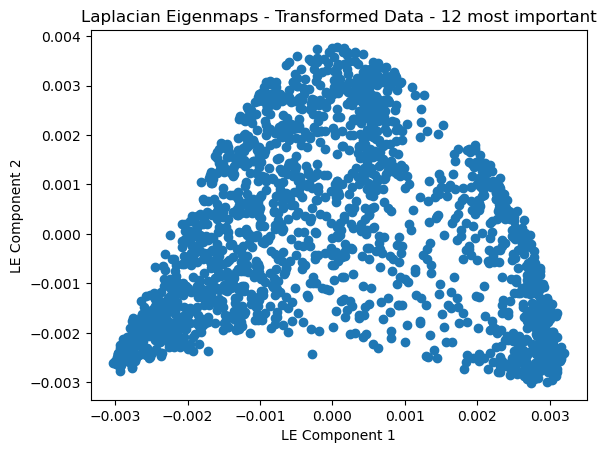

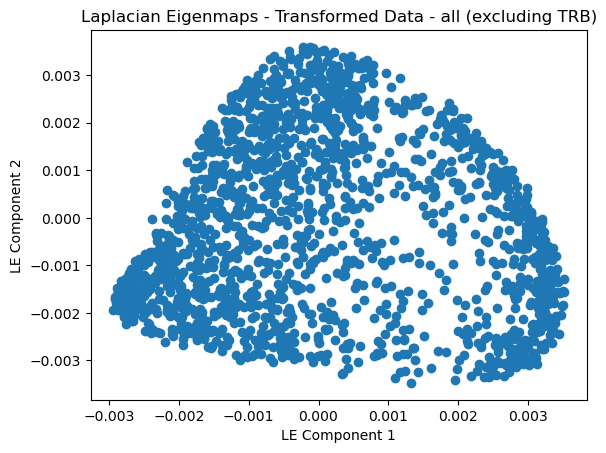

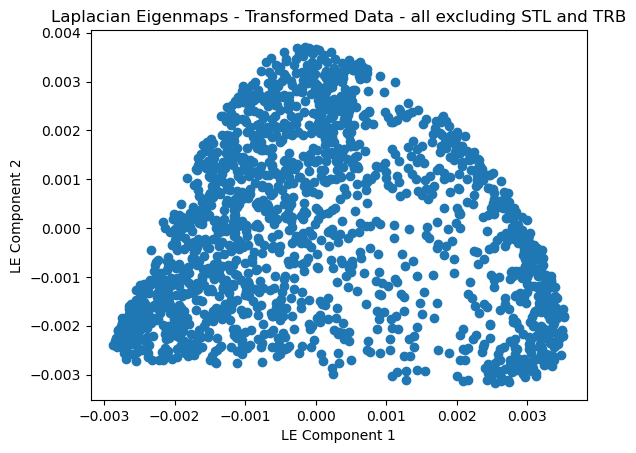

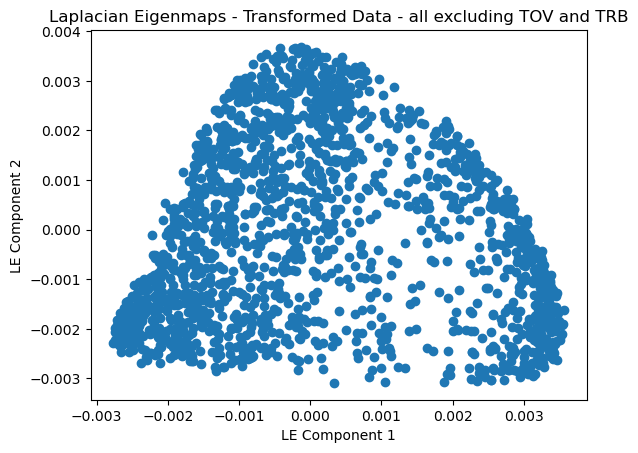

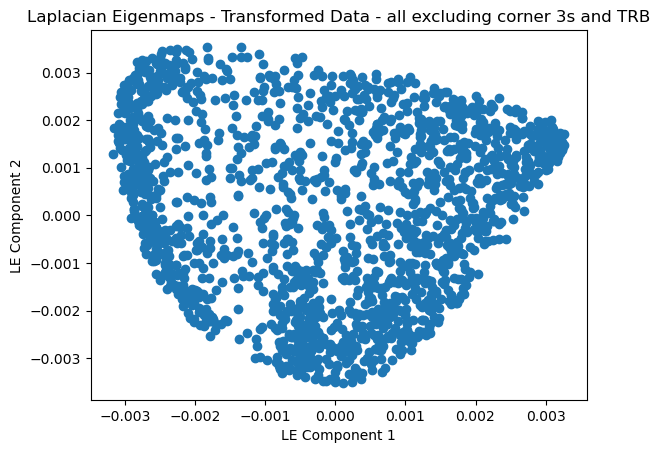

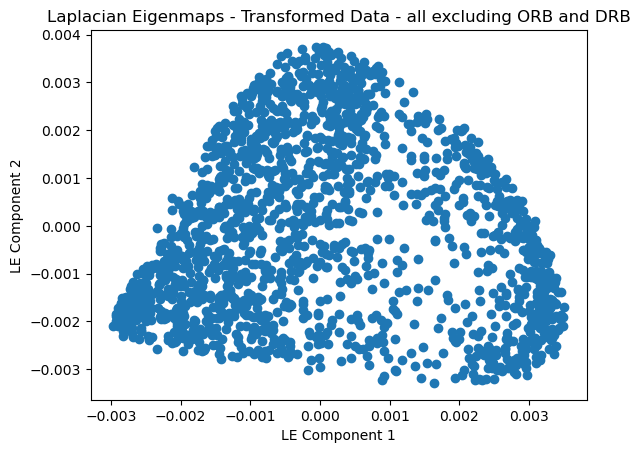

In [16]:
for features in le_dict:
    plt.scatter(le_dict[features][:, 0], le_dict[features][:, 1])
    plt.title(f'Laplacian Eigenmaps - Transformed Data - {features}')
    plt.xlabel('LE Component 1')
    plt.ylabel('LE Component 2')
    plt.show()

In [17]:
tSNE_dict = {}
for features in features_dict:
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(scaled_df[features_dict[features]])
    tSNE_dict[features] = tsne_results

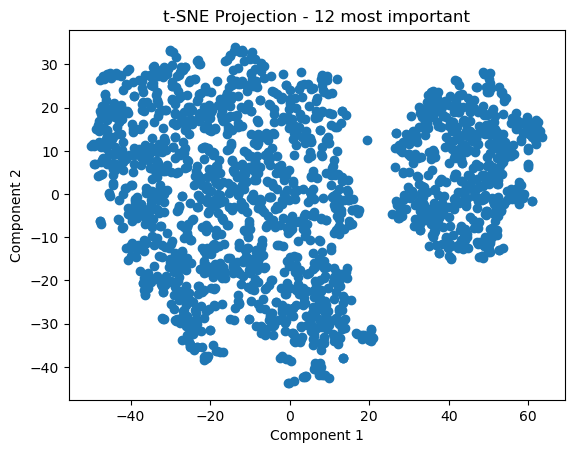

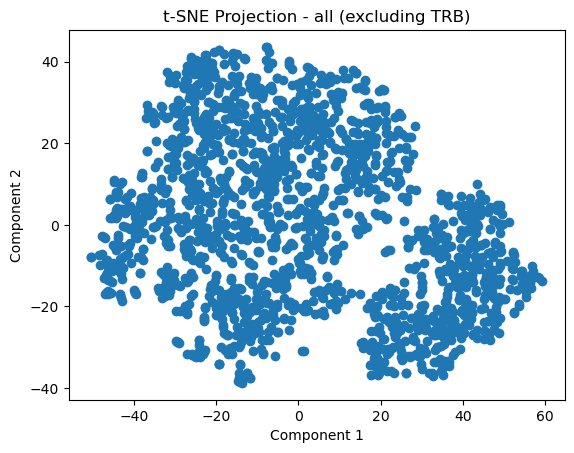

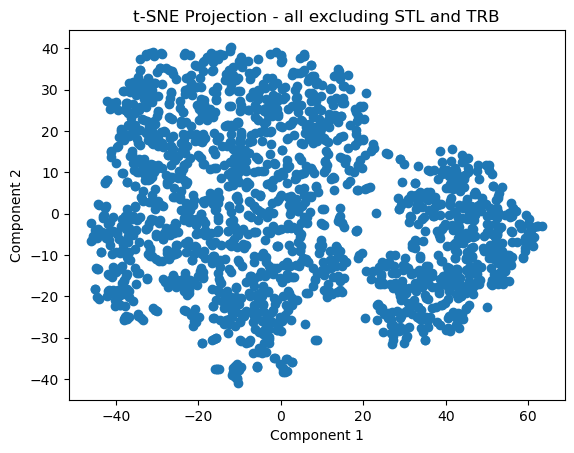

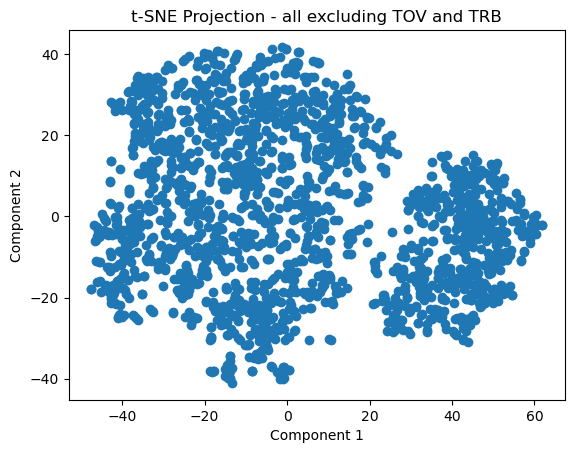

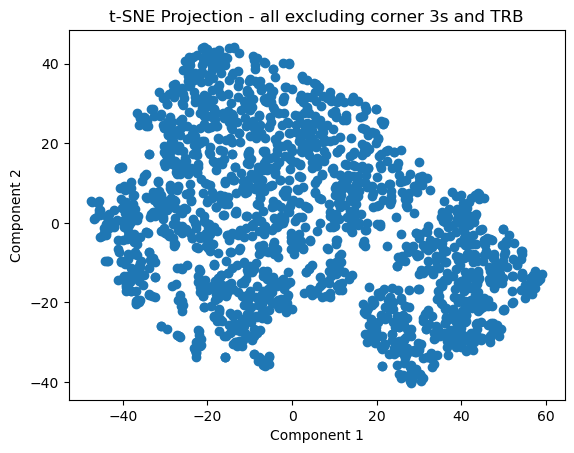

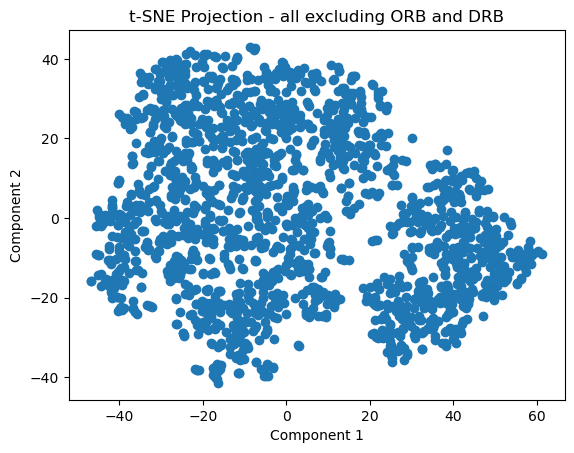

In [18]:
for features in tSNE_dict:
    plt.scatter(tSNE_dict[features][:, 0], tSNE_dict[features][:, 1])
    plt.title(f't-SNE Projection - {features}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

In [19]:
condensed_scaled_df = scaled_df.drop(columns = ['FTr', "% of FG Ast'd - 3P", 'Corner 3s - %3PA', 'DRB', 'ORB', 'TOV'])
condensed_scaled_df

USG%       FGA       BLK       STL       AST  \
Season Player                                                                   
2001   A.C. Green           -0.882749 -0.310444 -0.896616 -0.012633 -0.707002   
       Aaron Williams       -0.194864 -0.972320  0.461575 -0.660045 -0.932170   
       Adam Keefe           -1.469474  0.023716  0.659146  1.602297  0.321950   
       Al Harrington         0.007456 -0.593105 -0.894475 -0.001037  0.104263   
       Alan Henderson        0.776269 -0.055216 -0.590274 -0.294048 -1.078646   
...                               ...       ...       ...       ...       ...   
2024   Trayce Jackson-Davis -0.478110  0.432081  2.672423  0.116713  1.088198   
       Trendon Watford       0.472790  1.974594  0.363600  1.068715  2.909958   
       Trey Lyles           -0.882749 -0.259911 -0.490476 -0.805793  0.186055   
       Xavier Tillman Sr.   -0.801821  0.123371  1.180072  1.863689  1.059641   
       Zion Williamson       2.212735  0.072493 -0.537862 -0.336543  1.550637   

                             % of FG Ast'd - 2P  % of FGA by Distance - 3P  \
Season Player                                                                
2001   A.C. Green                      1.101919                  -0.903022   
       Aaron Williams                 -0.115725                  -0.974486   
       Adam Keefe                      0.402421                  -0.903022   
       Al Harrington                   0.333335                  -0.929821   
       Alan Henderson                 -0.858402                  -0.983419   
...                                         ...                        ...   
2024   Trayce Jackson-Davis            0.989654                  -0.974486   
       Trendon Watford                -1.773794                  -0.009717   
       Trey Lyles                      0.799667                   2.058284   
       Xavier Tillman Sr.              1.516436                   0.307406   
       Zion Williamson                -1.402456                  -0.916421   

                             % of FGA by Distance - 16-3P  \
Season Player                                               
2001   A.C. Green                                2.278780   
       Aaron Williams                           -0.406368   
       Adam Keefe                                0.836014   
       Al Harrington                             0.451276   
       Alan Henderson                           -0.823167   
...                                                   ...   
2024   Trayce Jackson-Davis                     -1.231951   
       Trendon Watford                          -1.047598   
       Trey Lyles                               -1.079659   
       Xavier Tillman Sr.                       -1.087674   
       Zion Williamson                          -1.207905   

                             % of FGA by Distance - 10-16  \
Season Player                                               
2001   A.C. Green                                0.794637   
       Aaron Williams                            0.322664   
       Adam Keefe                                0.880451   
       Al Harrington                             1.209402   
       Alan Henderson                            1.452540   
...                                                   ...   
2024   Trayce Jackson-Davis                     -1.465115   
       Trendon Watford                          -0.678492   
       Trey Lyles                               -1.236279   
       Xavier Tillman Sr.                       -0.678492   
       Zion Williamson                          -1.121861   

                             % of FGA by Distance - 3-10  \
Season Player                                              
2001   A.C. Green                              -0.906340   
       Aaron Williams                           0.927844   
       Adam Keefe                              -0.058030   
       Al Harrington                            0.790280   
       Alan Hend

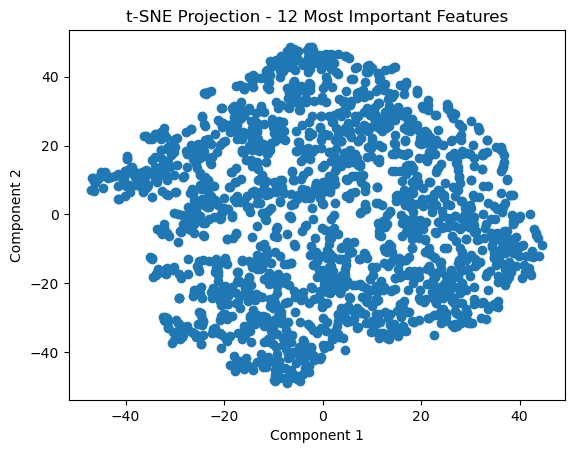

In [20]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(condensed_scaled_df)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title(f't-SNE Projection - 12 Most Important Features')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

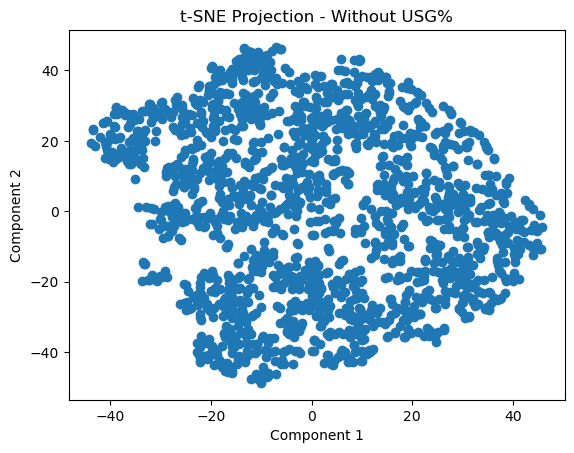

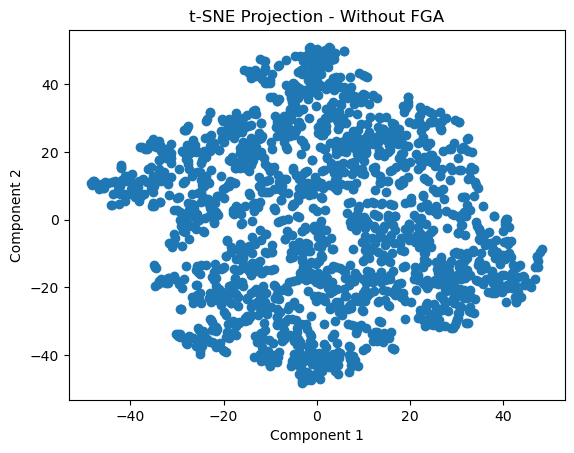

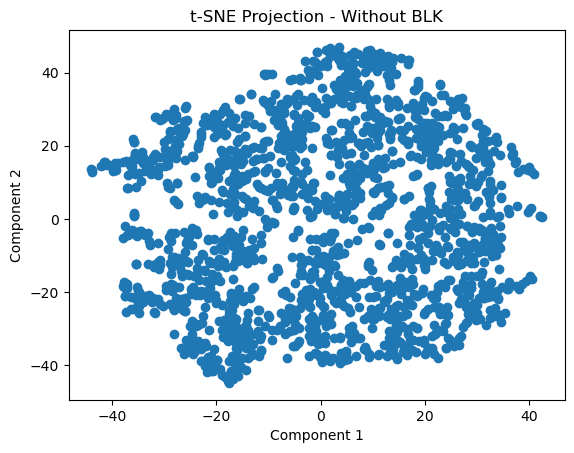

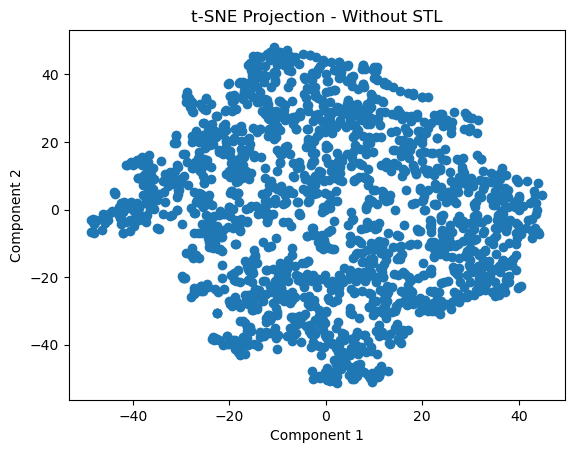

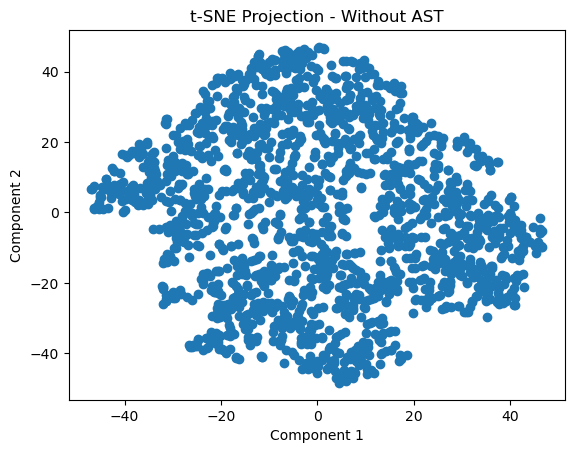

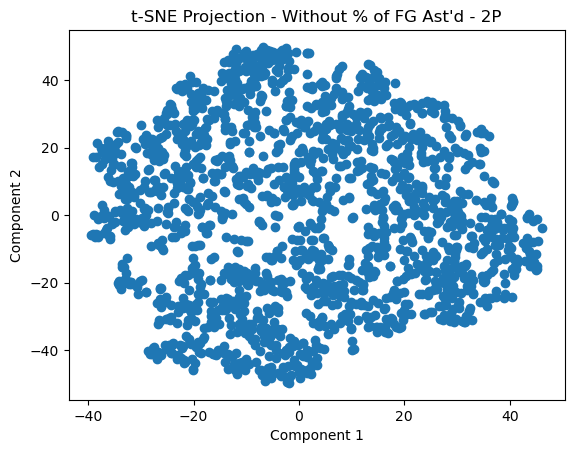

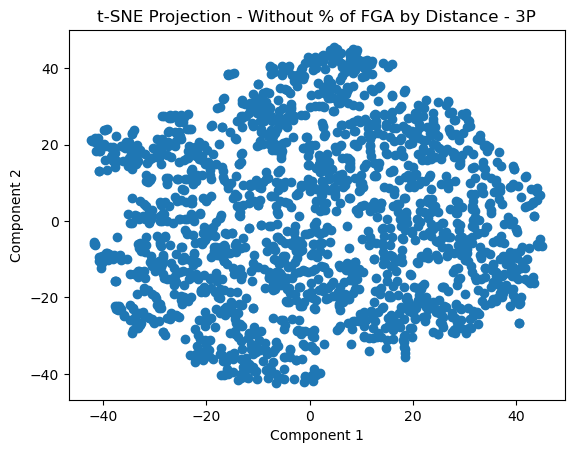

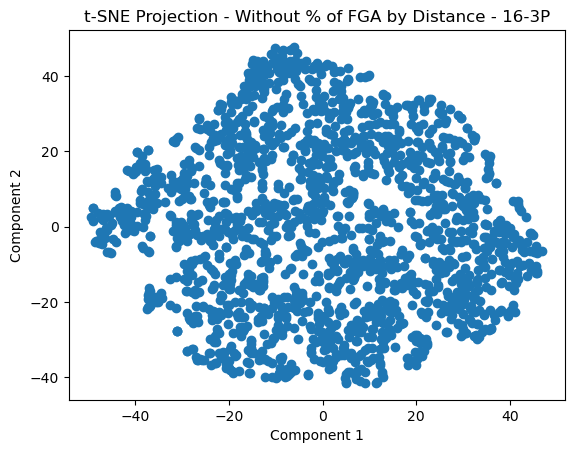

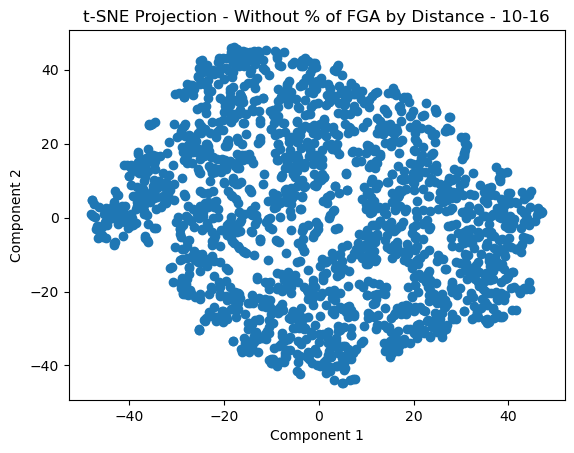

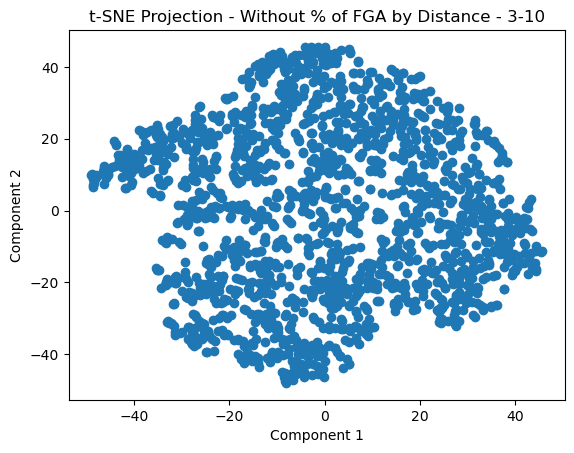

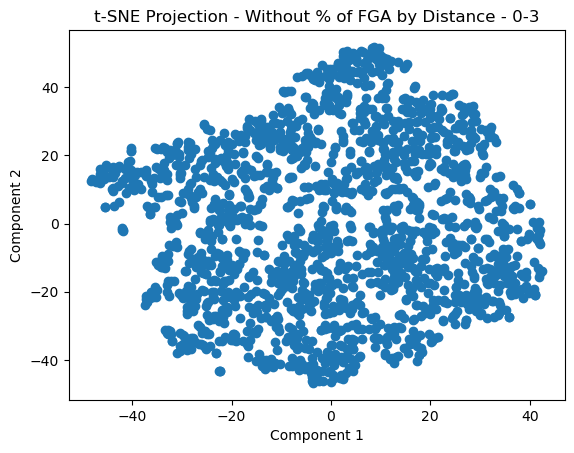

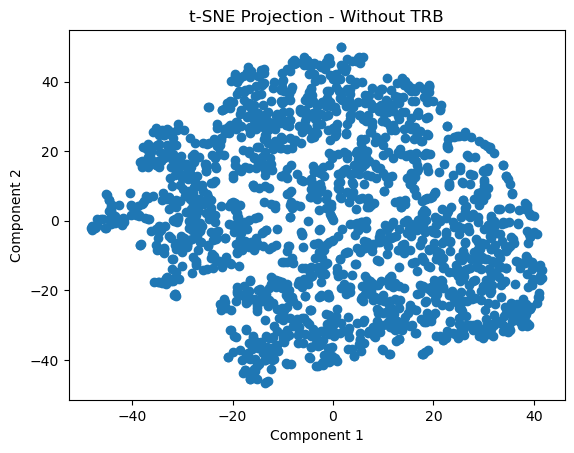

In [21]:
for col in condensed_scaled_df.columns:
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(condensed_scaled_df.drop(columns = [col]))
    
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.title(f't-SNE Projection - Without {col}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

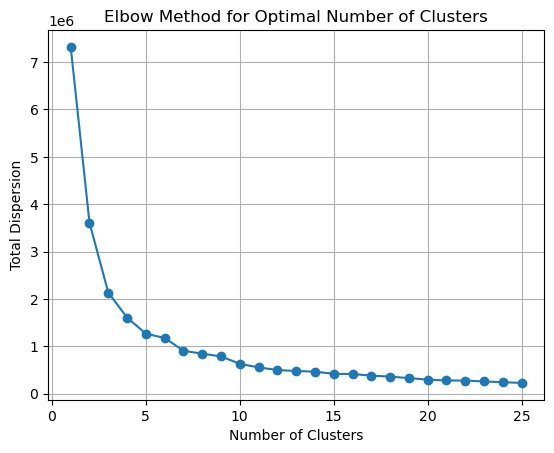

In [22]:
def calculate_dispersion(data, labels, n_clusters):
    total_dispersion = 0
    for cluster_id in range(n_clusters):
        cluster_points = data[labels == cluster_id]
        if len(cluster_points) > 1:
            pairwise_dist = pairwise_distances(cluster_points)
            cluster_dispersion = np.sum(pairwise_dist) / 2
        else:
            cluster_dispersion = 0
        total_dispersion += cluster_dispersion
    return total_dispersion

def elbow_method(data, max_clusters):
    dispersions = []
    for k in range(1, max_clusters + 1):
        ward = AgglomerativeClustering(n_clusters=k, linkage='ward')
        clusters = ward.fit_predict(data)
        dispersion = calculate_dispersion(data, clusters, k)
        dispersions.append(dispersion)
    return dispersions

# Calculate dispersions for each cluster count
max_clusters = 25
dispersions = elbow_method(condensed_scaled_df.reset_index(drop=True).to_numpy(), max_clusters)

# Plot the elbow method graph
plt.plot(range(1, max_clusters + 1), dispersions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Total Dispersion')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [23]:
values = condensed_scaled_df.values

# Create the model
n_clusters = 2
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Fit the model
cluster_labels = clustering.fit_predict(values)

# Assign clusters back to the df
condensed_scaled_df['Cluster'] = cluster_labels + 1

In [24]:
condensed_scaled_df

USG%       FGA       BLK       STL       AST  \
Season Player                                                                   
2001   A.C. Green           -0.882749 -0.310444 -0.896616 -0.012633 -0.707002   
       Aaron Williams       -0.194864 -0.972320  0.461575 -0.660045 -0.932170   
       Adam Keefe           -1.469474  0.023716  0.659146  1.602297  0.321950   
       Al Harrington         0.007456 -0.593105 -0.894475 -0.001037  0.104263   
       Alan Henderson        0.776269 -0.055216 -0.590274 -0.294048 -1.078646   
...                               ...       ...       ...       ...       ...   
2024   Trayce Jackson-Davis -0.478110  0.432081  2.672423  0.116713  1.088198   
       Trendon Watford       0.472790  1.974594  0.363600  1.068715  2.909958   
       Trey Lyles           -0.882749 -0.259911 -0.490476 -0.805793  0.186055   
       Xavier Tillman Sr.   -0.801821  0.123371  1.180072  1.863689  1.059641   
       Zion Williamson       2.212735  0.072493 -0.537862 -0.336543  1.550637   

                             % of FG Ast'd - 2P  % of FGA by Distance - 3P  \
Season Player                                                                
2001   A.C. Green                      1.101919                  -0.903022   
       Aaron Williams                 -0.115725                  -0.974486   
       Adam Keefe                      0.402421                  -0.903022   
       Al Harrington                   0.333335                  -0.929821   
       Alan Henderson                 -0.858402                  -0.983419   
...                                         ...                        ...   
2024   Trayce Jackson-Davis            0.989654                  -0.974486   
       Trendon Watford                -1.773794                  -0.009717   
       Trey Lyles                      0.799667                   2.058284   
       Xavier Tillman Sr.              1.516436                   0.307406   
       Zion Williamson                -1.402456                  -0.916421   

                             % of FGA by Distance - 16-3P  \
Season Player                                               
2001   A.C. Green                                2.278780   
       Aaron Williams                           -0.406368   
       Adam Keefe                                0.836014   
       Al Harrington                             0.451276   
       Alan Henderson                           -0.823167   
...                                                   ...   
2024   Trayce Jackson-Davis                     -1.231951   
       Trendon Watford                          -1.047598   
       Trey Lyles                               -1.079659   
       Xavier Tillman Sr.                       -1.087674   
       Zion Williamson                          -1.207905   

                             % of FGA by Distance - 10-16  \
Season Player                                               
2001   A.C. Green                                0.794637   
       Aaron Williams                            0.322664   
       Adam Keefe                                0.880451   
       Al Harrington                             1.209402   
       Alan Henderson                            1.452540   
...                                                   ...   
2024   Trayce Jackson-Davis                     -1.465115   
       Trendon Watford                          -0.678492   
       Trey Lyles                               -1.236279   
       Xavier Tillman Sr.                       -0.678492   
       Zion Williamson                          -1.121861   

                             % of FGA by Distance - 3-10  \
Season Player                                              
2001   A.C. Green                              -0.906340   
       Aaron Williams                           0.927844   
       Adam Keefe                              -0.058030   
       Al Harrington                            0.790280   
       Alan Hend

In [25]:
# Drop the "Cluster" column temporarily for t-SNE
features_only_df = condensed_scaled_df.drop(columns=['Cluster'])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_only_df)

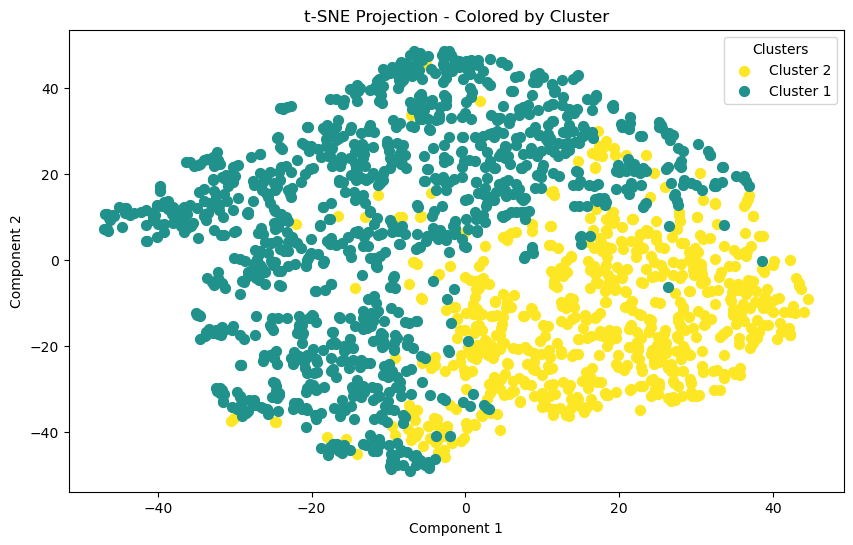

In [26]:
# Define a colormap for distinct colors
cmap = plt.colormaps['viridis'].resampled(len(condensed_scaled_df['Cluster'].unique())+1)

# Scatter plot with labeled clusters
plt.figure(figsize=(10, 6))
for cluster in condensed_scaled_df['Cluster'].unique():
    cluster_points = tsne_results[condensed_scaled_df['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f'Cluster {cluster}', c=[cmap(cluster)], s=50)

plt.title('t-SNE Projection - Colored by Cluster')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Clusters', loc='best')
plt.show()

In [27]:
df['Cluster'] = condensed_scaled_df['Cluster']

C:\Users\vaugh\AppData\Local\Temp\ipykernel_73032\39234393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = condensed_scaled_df['Cluster']


In [28]:
cluster_medians = condensed_scaled_df.reset_index(drop=True).groupby('Cluster').median()

In [29]:
cluster_medians

USG%       FGA       BLK       STL       AST  % of FG Ast'd - 2P  \
Cluster                                                                         
1        0.169311 -0.321738 -0.483155 -0.445886 -0.183832           -0.115725   
2       -0.346603  0.067822  0.293614  0.210949 -0.283437            0.272885   

         % of FGA by Distance - 3P  % of FGA by Distance - 16-3P  \
Cluster                                                            
1                         0.405670                     -0.205984   
2                        -0.943221                     -0.238046   

         % of FGA by Distance - 10-16  % of FGA by Distance - 3-10  \
Cluster                                                              
1                           -0.263728                    -0.264375   
2                           -0.077799                     0.228561   

         % of FGA by Distance - 0-3       TRB  
Cluster                                        
1                         -0.466291 -0.569413  
2                          0.818455  0.561827

In [30]:
# Create the model
n_clusters = 2
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Fit the model
cluster_labels = clustering.fit_predict(tsne_results)

# Assign clusters back to the df
tsne_df = pd.DataFrame(tsne_results, columns=['Component 1', 'Component 2'])
tsne_df['Cluster'] = cluster_labels + 1

In [31]:
tsne_df

Component 1  Component 2  Cluster
0       -7.060059   -41.847111        1
1        3.735047   -21.826275        1
2       22.836321    -5.028630        1
3      -12.361305   -24.017609        1
4        0.267582   -18.868414        1
...           ...          ...      ...
1767    30.705975   -21.197035        1
1768    30.685215    16.373711        2
1769     1.730600    42.347370        2
1770    30.842285    13.995189        2
1771   -47.003986     7.240720        2

[1772 rows x 3 columns]

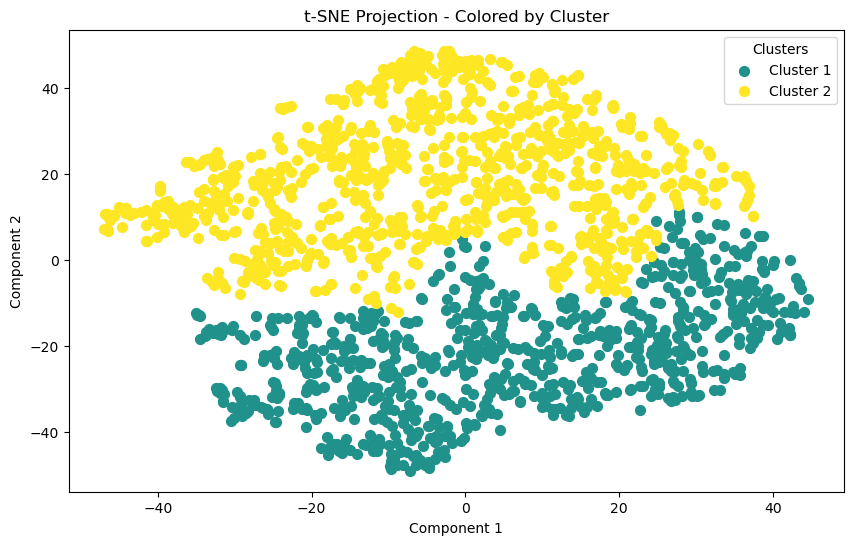

In [32]:
clustered_tsne = tsne_df.values

# Define a colormap for distinct colors
cmap = plt.colormaps['viridis'].resampled(len(tsne_df['Cluster'].unique())+1)

# Scatter plot with labeled clusters
plt.figure(figsize=(10, 6))
for cluster in tsne_df['Cluster'].unique():
    cluster_points = clustered_tsne[tsne_df['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f'Cluster {cluster}', c=[cmap(cluster)], s=50)

plt.title('t-SNE Projection - Colored by Cluster')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Clusters', loc='best')
plt.show()

In [69]:
features_only_df

USG%       BLK       AST  % of FG Ast'd - 3P  \
Season Player                                                              
2001   A.C. Green      -0.736527 -0.980401 -0.764748           -1.353489   
       Aaron Williams  -0.095009  1.151313 -0.502728           -1.353489   
       Adam Keefe      -1.283703 -0.083508 -0.462728            0.832492   
       Al Harrington    0.093672 -0.860674  0.360240           -1.353489   
       Alan Henderson   0.810662 -0.472659 -0.787380           -1.353489   
...                          ...       ...       ...                 ...   
2024   Trey Lyles      -0.736527 -0.527102  0.086557            0.832492   
       Usman Garuba     0.471035  6.932791  0.266519           -1.353489   
       Wenyen Gabriel  -0.245955 -0.051615 -0.545942            0.832492   
       Zeke Nnaji      -0.547845  2.201236  0.095141            0.832492   
       Zion Williamson  2.150301 -0.174074  2.787008            0.467434   

                        % of FG Ast'd - 2P       FTr  \
Season Player                                          
2001   A.C. Green                 0.807403  0.182016   
       Aaron Williams            -0.017263  0.782241   
       Adam Keefe                 0.333659  0.419418   
       Al Harrington              0.286869 -0.059867   
       Alan Henderson            -0.520251  0.455253   
...                                    ...       ...   
2024   Trey Lyles                 0.602699 -0.377897   
       Usman Garuba              -3.661001  0.137223   
       Wenyen Gabriel             0.514968 -0.337583   
       Zeke Nnaji                -0.040658  0.509004   
       Zion Williamson           -0.888719  0.670259   

                        % of FGA by Distance - 3P  \
Season Player                                       
2001   A.C. Green                       -0.852888   
       Aaron Williams                   -0.923118   
       Adam Keefe                       -0.852888   
       Al Harrington                    -0.879224   
       Alan Henderson                   -0.931896   
...                                           ...   
2024   Trey Lyles                        2.057250   
       Usman Garuba                     -0.203264   
       Wenyen Gabriel                    0.262007   
       Zeke Nnaji                       -0.260326   
       Zion Williamson                  -0.866056   

                        % of FGA by Distance - 16-3P  \
Season Player                                          
2001   A.C. Green                           2.202116   
       Aaron Williams                      -0.330841   
       Adam Keefe                           0.841124   
       Al Harrington                        0.478193   
       Alan Henderson                      -0.724016   
...                                              ...   
2024   Trey Lyles                          -0.965970   
       Usman Garuba                        -1.109630   
       Wenyen Gabriel                      -1.109630   
       Zeke Nnaji                          -1.056703   
       Zion Williamson                     -1.086947   

                        % of FGA by Distance - 10-16  \
Season Player                                          
2001   A.C. Green                           0.706539   
       Aaron Williams                       0.316769   
       Adam Keefe                           0.777406   
       Al Harrington                        1.049064   
       Alan Henderson                       1.249855   
...                                              ...   
2024   Trey Lyles                          -0.970653   
       Usman Garuba                        -1.230500   
       Wenyen Gabriel                      -0.155679   
       Zeke Nnaji                          -0.911597   
       Zion Williamson                     -0.876163   

                        % of FGA by Distance - 3-10  \
Season Player                                         
2001   A.C. Green                         -0.735610 

In [43]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook

In [72]:
# Setting the output for bokeh to stay in this notebook
output_notebook()

Loading BokehJS ...

In [50]:
# Applying tSNE to my data
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_only_df)

# Creating a dataframe with the resulting tSNE components
tsne_plotted_df = df.reset_index()
tsne_plotted_df['tSNE1'] = tsne_results[:, 0]
tsne_plotted_df['tSNE2'] = tsne_results[:, 1]


# Creating a ColumnDataSource for Bokeh
source = ColumnDataSource(tsne_plotted_df)

# Creating the figure for the bokeh plot
p = figure(
    title = 't-SNE Projection of Basketball Data - Power Forwards',
    x_axis_label = 'Component 1',
    y_axis_label = 'Component 2',
    width = 800,
    height = 600,
    tools = 'pan, wheel_zoom, box_zoom, reset, save'
)

# Creating the scatter plot
p.scatter(
    x = 'tSNE1',
    y = 'tSNE2',
    source = source,
    size = 10,
    alpha = 0.7,
    color = 'blue',
    legend_label = 'Power Forwards'
)

# Adding the hover tool for individual players
hover = HoverTool()
hover.tooltips = [
    ('Season', '@Season'),
    ('Player', '@Player'),
    ("USG%", "@{USG%}"),
    ("3P FGA%", "@{% of FGA by Distance - 3P}")
                 ]
p.add_tools(hover)

show(p)

In [48]:
features_only_df

USG%       FGA       BLK       STL       AST  \
Season Player                                                                   
2001   A.C. Green           -0.882749 -0.310444 -0.896616 -0.012633 -0.707002   
       Aaron Williams       -0.194864 -0.972320  0.461575 -0.660045 -0.932170   
       Adam Keefe           -1.469474  0.023716  0.659146  1.602297  0.321950   
       Al Harrington         0.007456 -0.593105 -0.894475 -0.001037  0.104263   
       Alan Henderson        0.776269 -0.055216 -0.590274 -0.294048 -1.078646   
...                               ...       ...       ...       ...       ...   
2024   Trayce Jackson-Davis -0.478110  0.432081  2.672423  0.116713  1.088198   
       Trendon Watford       0.472790  1.974594  0.363600  1.068715  2.909958   
       Trey Lyles           -0.882749 -0.259911 -0.490476 -0.805793  0.186055   
       Xavier Tillman Sr.   -0.801821  0.123371  1.180072  1.863689  1.059641   
       Zion Williamson       2.212735  0.072493 -0.537862 -0.336543  1.550637   

                             % of FG Ast'd - 2P  % of FGA by Distance - 3P  \
Season Player                                                                
2001   A.C. Green                      1.101919                  -0.903022   
       Aaron Williams                 -0.115725                  -0.974486   
       Adam Keefe                      0.402421                  -0.903022   
       Al Harrington                   0.333335                  -0.929821   
       Alan Henderson                 -0.858402                  -0.983419   
...                                         ...                        ...   
2024   Trayce Jackson-Davis            0.989654                  -0.974486   
       Trendon Watford                -1.773794                  -0.009717   
       Trey Lyles                      0.799667                   2.058284   
       Xavier Tillman Sr.              1.516436                   0.307406   
       Zion Williamson                -1.402456                  -0.916421   

                             % of FGA by Distance - 16-3P  \
Season Player                                               
2001   A.C. Green                                2.278780   
       Aaron Williams                           -0.406368   
       Adam Keefe                                0.836014   
       Al Harrington                             0.451276   
       Alan Henderson                           -0.823167   
...                                                   ...   
2024   Trayce Jackson-Davis                     -1.231951   
       Trendon Watford                          -1.047598   
       Trey Lyles                               -1.079659   
       Xavier Tillman Sr.                       -1.087674   
       Zion Williamson                          -1.207905   

                             % of FGA by Distance - 10-16  \
Season Player                                               
2001   A.C. Green                                0.794637   
       Aaron Williams                            0.322664   
       Adam Keefe                                0.880451   
       Al Harrington                             1.209402   
       Alan Henderson                            1.452540   
...                                                   ...   
2024   Trayce Jackson-Davis                     -1.465115   
       Trendon Watford                          -0.678492   
       Trey Lyles                               -1.236279   
       Xavier Tillman Sr.                       -0.678492   
       Zion Williamson                          -1.121861   

                             % of FGA by Distance - 3-10  \
Season Player                                              
2001   A.C. Green                              -0.906340   
       Aaron Williams                           0.927844   
       Adam Keefe                              -0.058030   
       Al Harrington                            0.790280   
       Alan Hend

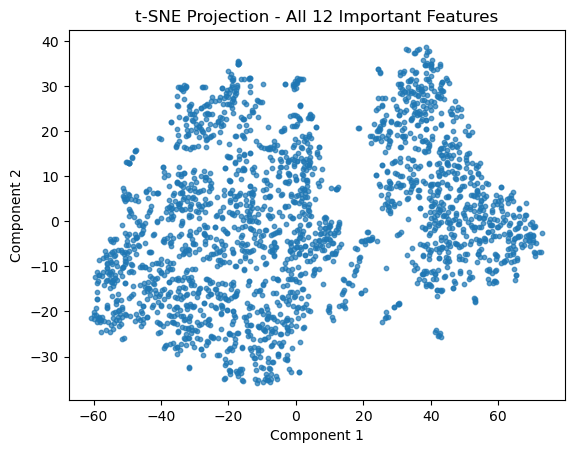

In [45]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_only_df)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=10, alpha=0.7)
plt.title(f't-SNE Projection - All 12 Important Features')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

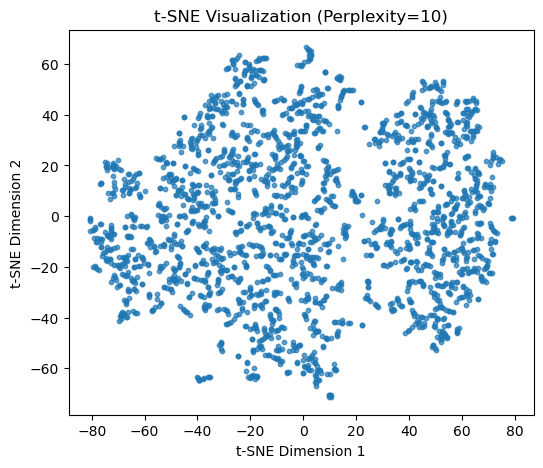

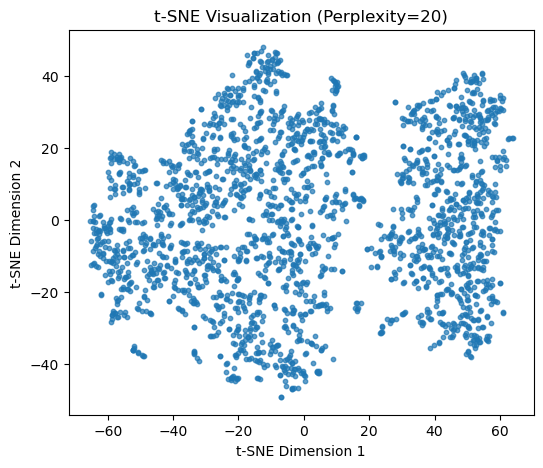

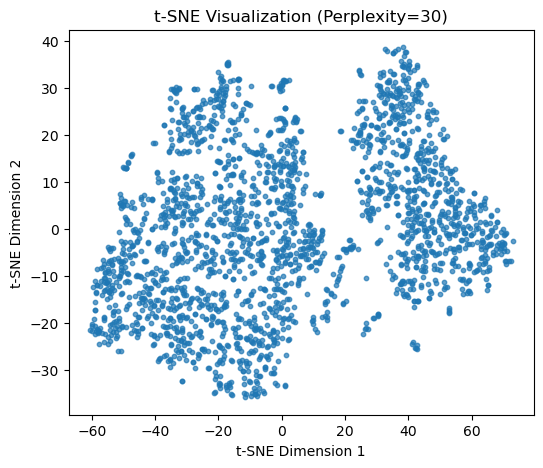

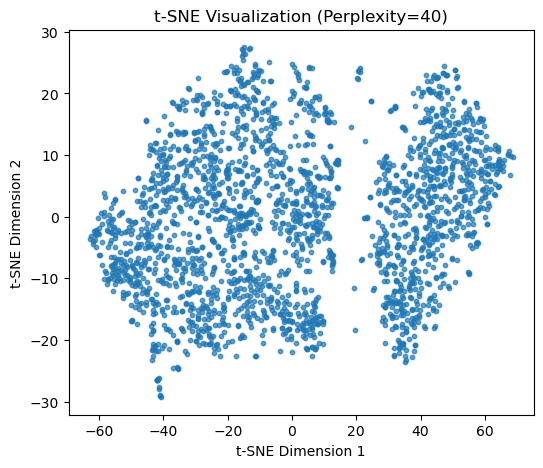

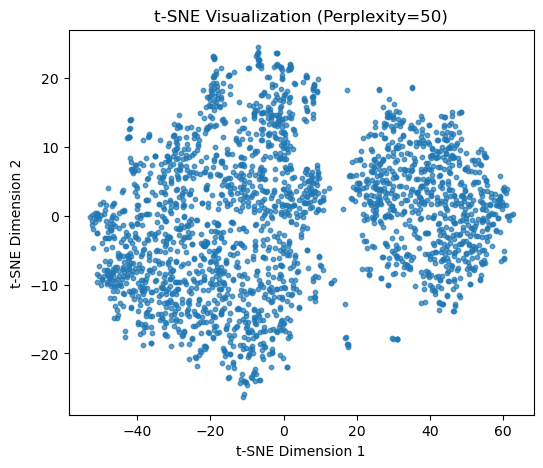

In [46]:
# Initialize t-SNE with different perplexity values
perplexities = [10, 20, 30, 40, 50]

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    df_embedded = tsne.fit_transform(features_only_df)

    # Plot results
    plt.figure(figsize=(6, 5))
    plt.scatter(df_embedded[:, 0], df_embedded[:, 1], s=10, alpha=0.7)
    plt.title(f't-SNE Visualization (Perplexity={perplexity})')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.show()

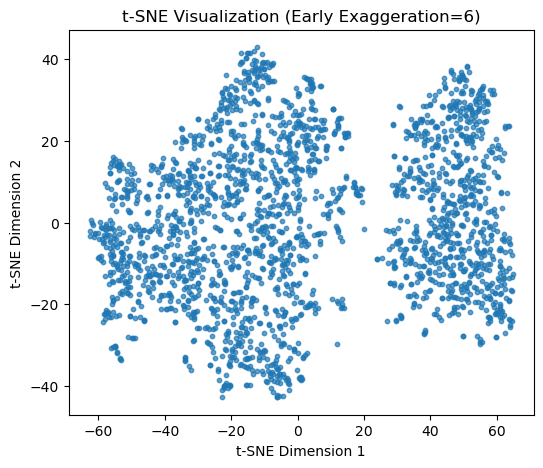

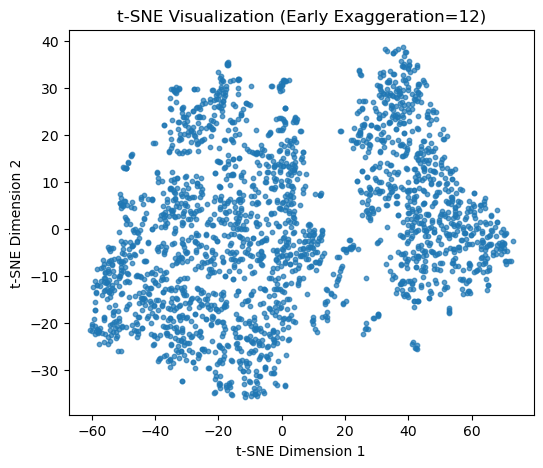

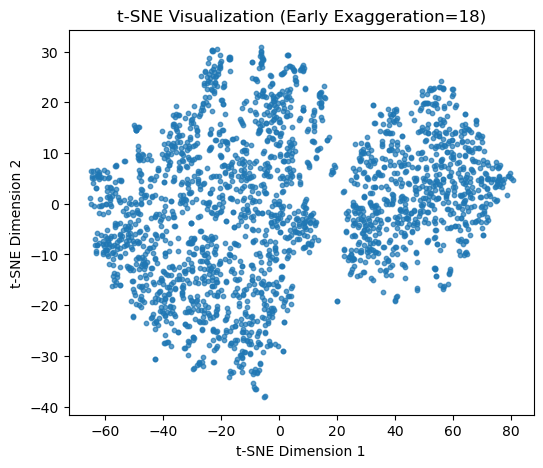

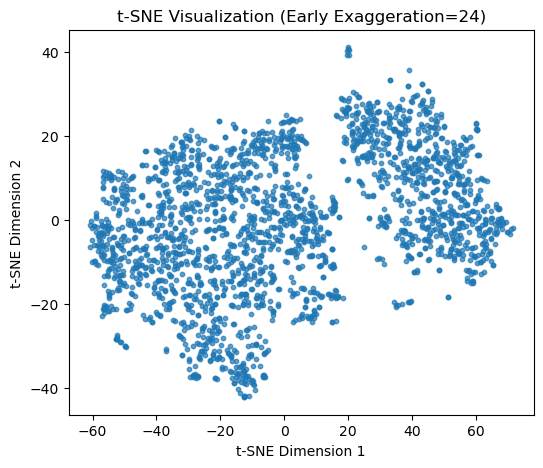

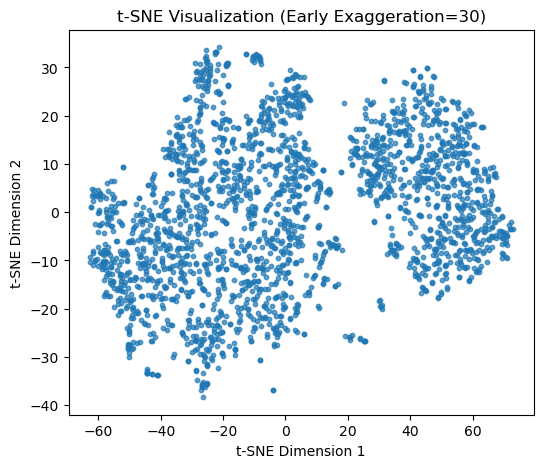

In [48]:
early_exaggerations = [6, 12, 18, 24, 30]

for exaggeration in early_exaggerations:
    tsne = TSNE(n_components=2, early_exaggeration=exaggeration, random_state=42)
    df_embedded = tsne.fit_transform(features_only_df)
    
    plt.figure(figsize=(6, 5))
    plt.scatter(df_embedded[:, 0], df_embedded[:, 1], s=10, alpha=0.7)
    plt.title(f't-SNE Visualization (Early Exaggeration={exaggeration})')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.show()

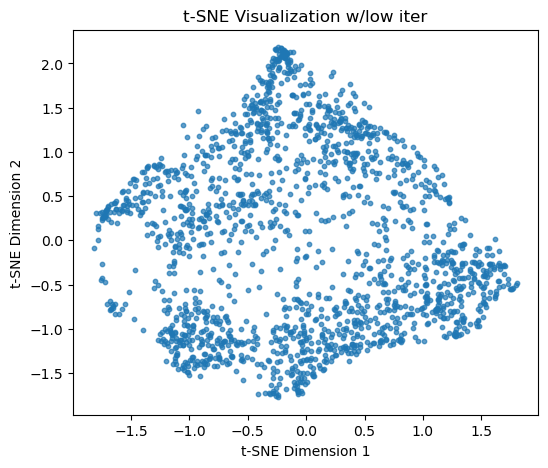

In [45]:
tsne = TSNE(n_components=2, early_exaggeration=4, n_iter=250, random_state=42)
tsne_df = tsne.fit_transform(features_only_df)

plt.figure(figsize=(6, 5))
plt.scatter(tsne_df[:, 0], tsne_df[:, 1], s=10, alpha=0.7)
plt.title(f't-SNE Visualization w/low iter')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [125]:
all_positions = pd.read_csv(r"C:\Users\vaugh\Desktop\basketball-pf-research\Data to Replicate Richardson's Results\full_dataset_before_PCA.csv")
all_positions.set_index(['Season', 'Player'], inplace=True)

In [126]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(all_positions)

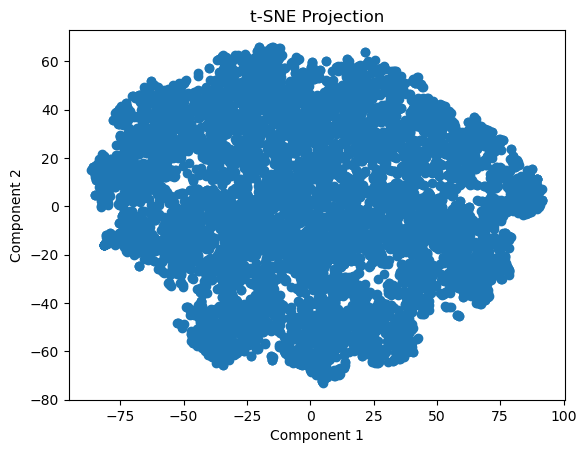

In [127]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title('t-SNE Projection')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()